In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
##26p

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

In [4]:
data = datasets.load_breast_cancer()
X=data.data
y=data.target

In [5]:
print(X)
print(y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [6]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [7]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
y_pred = clf.predict(X_test)

In [9]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
##31p

Confusion Matrix
[[38 11]
 [ 3 62]]


In [10]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))
##31p

Confusion Matrix
[[62  3]
 [11 38]]


In [11]:
print('Accuracy')
print(accuracy_score(y_test, y_pred, normalize=True))

Accuracy
0.8771929824561403


In [12]:
print('Classification Report')
print(classification_report(y_test, y_pred))
##precision 정밀도
##recall 재현률

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.78      0.84        49
           1       0.85      0.95      0.90        65

    accuracy                           0.88       114
   macro avg       0.89      0.86      0.87       114
weighted avg       0.88      0.88      0.88       114



In [13]:
print('AOC')
print(roc_auc_score(y_test, y_pred))

AOC
0.8646781789638932


In [14]:
print('Mean Squared Error')
print(mean_squared_error(y_test, y_pred))

Mean Squared Error
0.12280701754385964


In [15]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X,y)
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [16]:
for train_index, test_index in skf.split(X,y):
    print('Train set : ',train_index)
    print('Test set : ', test_index)

Train set :  [ 25  26  27  28  29  30  31  32  33  34  35  36  38  39  40  41  42  43
  44  45  47  53  54  56  57  62  64  65  70  72  73  75  77  78  82  83
  85  86  87  91  94  95  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
 291 292 293 294 295 296 297 298 299 3

In [17]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X,y,cv=skf)
print(scores)
print('***'*10)
print(scores.mean())

[0.9122807  0.87719298 0.9122807  0.89473684 0.96491228 0.89473684
 0.89473684 0.94736842 0.92982456 0.89285714]
******************************
0.9120927318295738


In [18]:
skf_sh=StratifiedKFold(n_splits=10, shuffle=True)
skf_sh.get_n_splits(X,y)
print(skf_sh)

StratifiedKFold(n_splits=10, random_state=None, shuffle=True)


In [19]:
for train_index, test_index in skf_sh.split(X,y):
    print('Train set : ',train_index)
    print('Test set : ', test_index)

Train set :  [  0   1   2   3   5   6   8   9  11  12  13  14  15  17  18  19  20  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  40  41
  42  43  44  45  46  47  48  49  50  51  52  53  55  56  57  58  59  61
  64  66  67  68  69  70  72  73  74  75  76  77  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 127 128 131 132 133 135 136 137 138 139 141 142 143 145 146
 147 148 149 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 208 209 210 211 212 213 215 216 218 219 220 221 222 223
 225 226 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 244
 245 246 247 248 249 250 251 253 254 255 256 257 258 259 260 261 262 263
 264 267 268 269 270 271 272 273 274 2

In [20]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X,y,cv=skf_sh)
print(scores)
print('***'*10)
print(scores.mean())

[0.89473684 0.9122807  0.87719298 0.87719298 0.96491228 0.92982456
 0.89473684 0.94736842 0.9122807  0.98214286]
******************************
0.9192669172932331


# 단일선형 회귀 분석 실습 1

In [ ]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))
##31p

In [21]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.style.use('ggplot')

In [22]:
data = {'x':[13,19,16,14,15,14],'y':[40,83,62,48,58,43]}
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


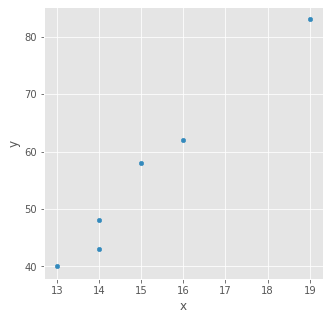

In [25]:
data.plot(kind='scatter', x='x',y='y', figsize=(5,5))

In [28]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(data['x']), y=data['y'])
print('a_value = ', linear_regression.intercept_)
print('b_value = ', linear_regression.coef_)

a_value =  -55.48175182481753
b_value =  [7.32846715]


In [29]:
prediction = linear_regression.predict(X = pd.DataFrame(data['x']))
residuals = data['y']-prediction
print(prediction)
print(residuals)

residuals.describe()

[39.78832117 83.75912409 61.77372263 47.11678832 54.44525547 47.11678832]
0    0.211679
1   -0.759124
2    0.226277
3    0.883212
4    3.554745
5   -4.116788
Name: y, dtype: float64


count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

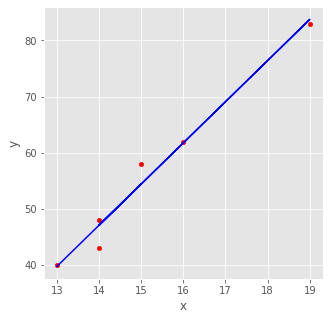

In [36]:
data.plot(kind='scatter', x='x', y='y', figsize=(5,5), color='red')
plt.plot(data['x'], prediction, color='blue')

In [37]:
from sklearn.metrics import mean_squared_error